In [66]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sys

#не забыть потом вставить 

#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#import seaborn as sns

print("Tensorflow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)
print(tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.10.1
Keras version: 2.10.0
[]


In [65]:
# =========================
# 1) DATA PREPROCESSING
# =========================

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# ===== Проверка версий и GPU =====
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
gpus = tf.config.list_physical_devices('GPU')
print(gpus)

print(sys.version)

Tensorflow version: 2.10.1
Keras Version: 2.10.0
[]
3.8.20 | packaged by conda-forge | (default, Sep 30 2024, 17:44:03) [MSC v.1929 64 bit (AMD64)]


In [4]:
# ===== Part 1 - Data Preprocessing =====
# Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(   
    r"C:\Users\aikid\Downloads\Zadanie2\archive (3)\seg_train\seg_train\train",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale=1./255)

# >>>>>>> ВОТ ЗДЕСЬ СТАВИШЬ СВОЙ ПУТЬ К test_set <<<<<<<
test_set = test_datagen.flow_from_directory(    
    r"C:\Users\aikid\Downloads\Zadanie2\archive (3)\seg_test\seg_test\test",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print(training_set.samples)

Found 9378 images belonging to 4 classes.
Found 1989 images belonging to 4 classes.
9378


In [6]:
# ===== Part 2 - Building the CNN =====
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(
    filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)
))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Adding a second pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
# cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Adding a second pooling layer
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))


In [7]:
# ===== Compiling the CNN =====
cnn.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

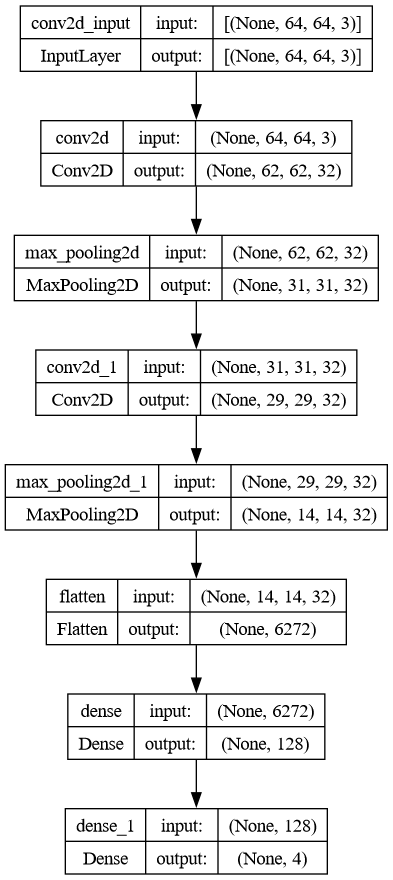

In [11]:
# ===== Plot model (как на фото) =====
from keras.utils.vis_utils import plot_model
plot_model(cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


C:\Users\aikid\anaconda3\envs\neuron\lib\site-packages\visualkeras\layered.py:231: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


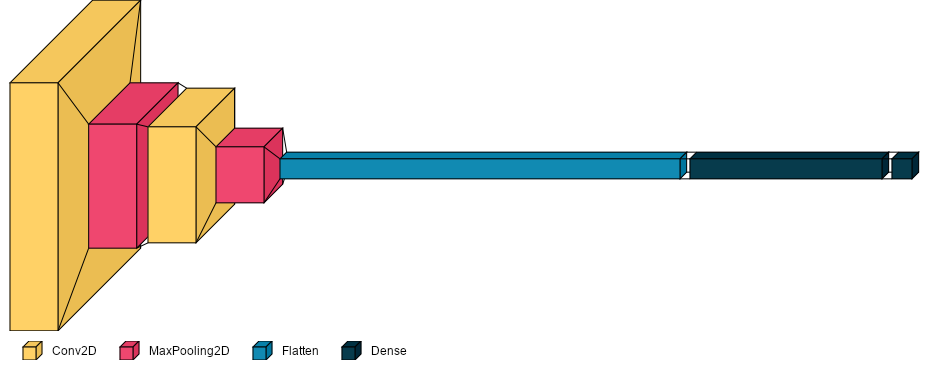

In [9]:
# ===== Visualkeras (как на фото) =====
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(cnn, legend=True)  # without custom font
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(cnn, legend=True, font=font, to_file='model_layered.png')


In [10]:
# ===== Training =====
hist = cnn.fit(x=training_set, validation_data=test_set, epochs=20)
# hist = cnn.fit(x=training_set, epochs=4)

Epoch 1/20
294/294 [==============================] - 162s 540ms/step - loss: 1.1191 - accuracy: 0.5066 - val_loss: 0.7704 - val_accuracy: 0.6988
Epoch 2/20
294/294 [==============================] - 52s 176ms/step - loss: 0.7886 - accuracy: 0.6860 - val_loss: 0.8603 - val_accuracy: 0.6621
Epoch 3/20
294/294 [==============================] - 37s 126ms/step - loss: 0.7210 - accuracy: 0.7156 - val_loss: 0.6398 - val_accuracy: 0.7446
Epoch 4/20
294/294 [==============================] - 37s 126ms/step - loss: 0.6478 - accuracy: 0.7495 - val_loss: 0.7952 - val_accuracy: 0.6958
Epoch 5/20
294/294 [==============================] - 37s 127ms/step - loss: 0.6514 - accuracy: 0.7496 - val_loss: 0.6254 - val_accuracy: 0.7446
Epoch 6/20
294/294 [==============================] - 37s 126ms/step - loss: 0.5603 - accuracy: 0.7856 - val_loss: 0.6601 - val_accuracy: 0.7325
Epoch 7/20
294/294 [==============================] - 37s 127ms/step - loss: 0.5880 - accuracy: 0.7740 - val_loss: 0.6691 - val_a

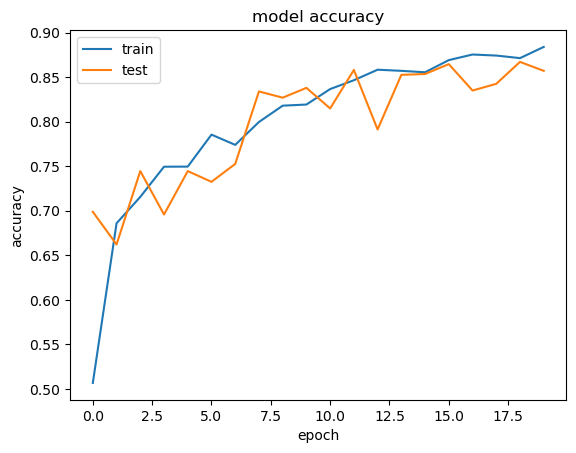

In [12]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# <-- тут можно указать путь, куда сохранить картинку
plt.savefig('Model_accuracy.jpg', dpi=500)

plt.show()


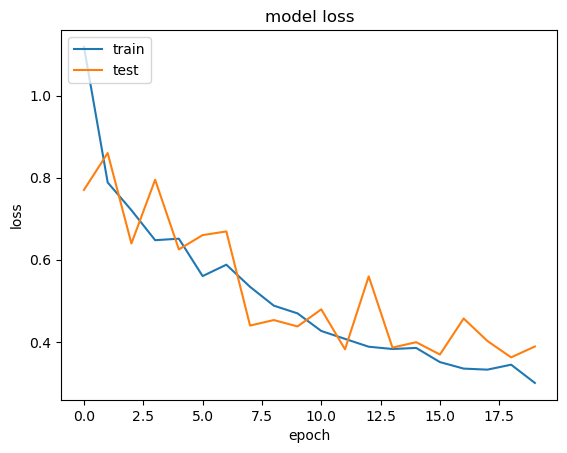

In [13]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# <-- тут можно указать путь, куда сохранить картинку
plt.savefig('Model_loss.jpg', dpi=500)

plt.show()


In [54]:
import numpy as np
from keras.utils import load_img, img_to_array
img_path = r"C:/Users/aikid/Downloads/Zadanie2/glacier_example.jpg" 

# <-- ВОТ ЗДЕСЬ ставишь путь к твоей картинке
test_image = load_img(img_path, target_size=(64, 64))
test_image = img_to_array(test_image)


In [55]:
test_image = np.expand_dims(test_image, axis=0)

In [56]:
result = cnn.predict(test_image/255.0)
print("raw result:", result)


1/1 [==============================] - 0s 92ms/step
raw result: [[8.1914645e-03 4.1004198e-04 9.5851940e-01 3.2879081e-02]]


In [57]:
training_set.class_indices

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3}

In [58]:
slovnik = {0: "building", 1: "forest", 2: "glacier", 3: "mountain"}

predikcia = np.argmax(result, axis=1).astype(int)
predikcia

array([2])

In [59]:
print('Na obrazku je', slovnik[predikcia[0]])


Na obrazku je glacier


In [60]:
import cv2
im = cv2.imread(img_path, 1)

text = slovnik[predikcia[0]] 
#font = cv2.FONT_HERSHEY_SIMPLEX
#cv2.putText(im, 'Christmas', (10,450), font, 3, (0, 255, 0), 2, cv2.LINE_AA)

cv2.putText(im, text, (20, 60), cv2.FONT_HERSHEY_SIMPLEX,  2, (0, 255, 0), 3, cv2.LINE_AA)
cv2.imwrite("glacier_with_signature.jpg", im)
print("Saved: glacier_with_signature.jpg")

from IPython.display import Image, display
display(Image(filename=img_path)

Saved: glacier_with_signature.jpg


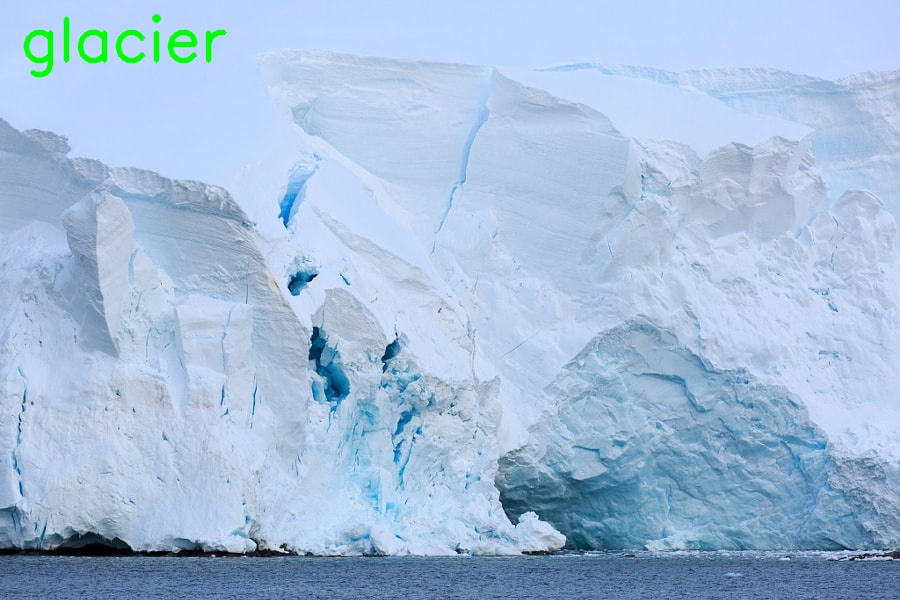

In [63]:
from IPython.display import Image, display
display(Image(filename= r"C:/Users/aikid/Downloads/Zadanie2/glacier_with_signature.jpg" ))

In [ ]:
#Confusion Matrix pre celu siet

63/63 [==============================] - 2s 37ms/step - loss: 0.3885 - accuracy: 0.8572
test loss, test acc: [0.3885203003883362, 0.8572146892547607]
63/63 [==============================] - 2s 38ms/step
accuracy_score: 0.8572146807440925
confusion matrix:
 [[408  18   4   7]
 [ 13 458   1   2]
 [ 29  10 401 113]
 [ 31   4  52 438]]


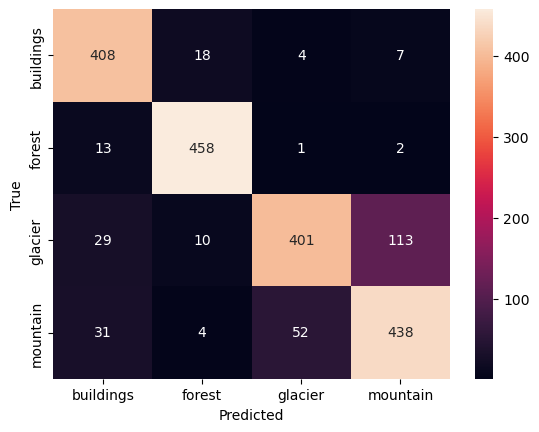

labels order: ['buildings', 'forest', 'glacier', 'mountain']
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       437
           1       0.93      0.97      0.95       474
           2       0.88      0.73      0.79       553
           3       0.78      0.83      0.81       525

    accuracy                           0.86      1989
   macro avg       0.86      0.86      0.86      1989
weighted avg       0.86      0.86      0.86      1989



In [71]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# 1) evaluate (loss, accuracy)
results_validation = cnn.evaluate(test_set, batch_size=32)
print("test loss, test acc:", results_validation)

# 2) predictions для confusion matrix / report
probs = cnn.predict(test_set)
predictions = np.argmax(probs, axis=1)

# 3) accuracy_score
print("accuracy_score:", accuracy_score(test_set.classes, predictions))

# 4) confusion matrix
cm = confusion_matrix(test_set.classes, predictions)
print("confusion matrix:\n", cm)

# 5) heatmap
#sns.heatmap(cm, annot=True, fmt="d")
labels = [k for k, v in sorted(test_set.class_indices.items(), key=lambda x: x[1])]
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 6) classification report
print("labels order:", labels)
print(classification_report(test_set.classes, predictions))


In [72]:
from keras.models import save_model

In [74]:
# ===== 1) Сохранить архитектуру в JSON =====
neo_v1 = cnn
model_json = neo_v1.to_json()
with open("neo_v1.json", "w") as json_file:
    json_file.write(model_json)

In [75]:
# ===== 2) Сохранить модель (веса) =====
save_model(neo_v1, "neo_v1_weights.hdf5")   # создаст файл


In [76]:
# ===== 3) Прочитать JSON обратно =====
with open("neo_v1.json", "r") as json_file:
    json_saved_model = json_file.read()

In [77]:
# ===== 4) Восстановить модель из JSON =====
network_loaded = tf.keras.models.model_from_json(json_saved_model)

# ===== 5) Загрузить веса =====
network_loaded.load_weights("neo_v1_weights.hdf5")

# ===== 6) Снова скомпилировать =====
network_loaded.compile(
    loss="categorical_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

# ===== 7) Проверка =====
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8